In [14]:
import pandas as pd

class WczytajBazeProbekZTekstem:
    def __init__(self, nazwa_pliku_z_wartosciami, nazwa_pliku_z_opisem_atr):
        self.nazwa_pliku_z_wartosciami = nazwa_pliku_z_wartosciami
        self.nazwa_pliku_z_opisem_atr = nazwa_pliku_z_opisem_atr

    def NazwyAtr(self):
        atr = pd.read_csv(self.nazwa_pliku_z_opisem_atr, sep="\s+", header=None)
        return list(atr[0])

    def Probki(self):
            names = self.NazwyAtr()
            probki = pd.read_csv(self.nazwa_pliku_z_wartosciami, sep="\s+", names=names)
            return probki

    def CzyAtrSymb(self, wiersz):
        atr = pd.read_csv(self.nazwa_pliku_z_opisem_atr, sep="\s+", header=None)
        if atr[1][wiersz] == 's':
            return True
        else:
            return False


test = WczytajBazeProbekZTekstem("spirala.txt", "spirala-type.txt")
print(test.Probki())
print(test.CzyAtrSymb(1))
print(test.NazwyAtr())

          x       y
0   -0.0824  0.9435
1    0.0913  0.9575
2    0.0476  1.0683
3    0.2311  1.0452
4    0.2269  0.9615
..      ...     ...
96  -0.5031  1.8191
97  -0.3340  1.8515
98  -0.3200  1.9158
99  -0.2074  1.9929
100  0.0322  1.9473

[101 rows x 2 columns]
False
['x', 'y']


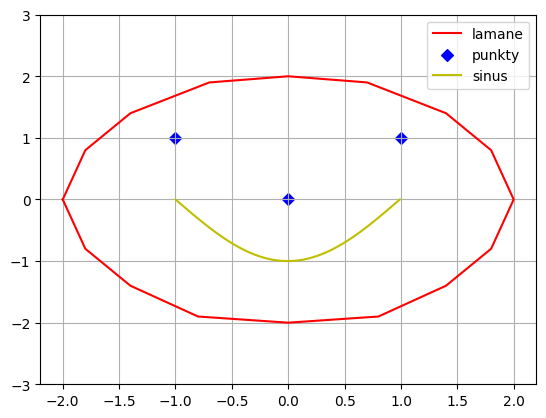

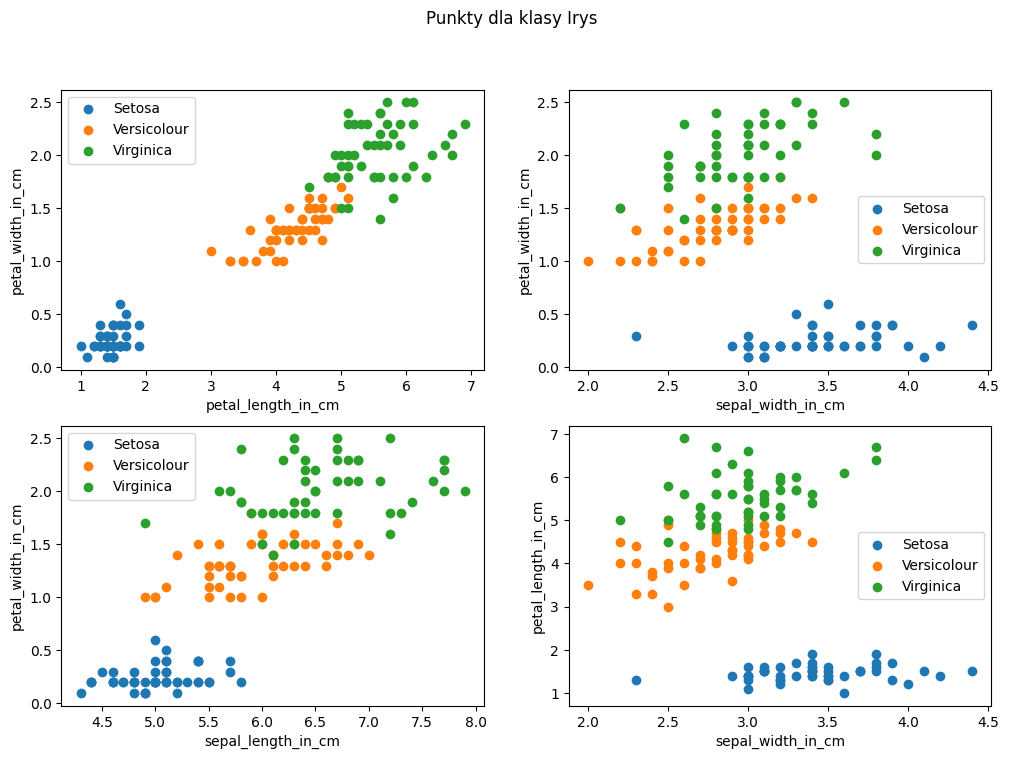

In [7]:
import matplotlib.pyplot as plt
import numpy as np
#from zad1 import WczytajBazeProbekZTekstem

x1 = [-2, -1.8, -1.4, -0.7, 0, 0.7, 1.4, 1.8, 2, 1.8, 1.4, 0.8, 0, -0.8, -1.4, -1.8, -2]
y1 = [0, 0.8, 1.4, 1.9, 2, 1.9, 1.4, 0.8, 0, -0.8, -1.4, -1.9, -2, -1.9, -1.4, -0.8, 0]

x2 = [-1, 0, 1]
y2 = [1, 0, 1]

sin = np.linspace(np.pi, 2*np.pi, 200)
x3 = np.arange(-1, 1, 0.01)
y3 = np.sin(sin)

plt.plot(x1, y1, label='lamane', color='r')
plt.scatter(x2, y2, label='punkty', color='b', marker='D')
plt.plot(x3, y3, label='sinus', color='y')

plt.legend()
plt.ylim(-3,3)
plt.grid()
plt.show()

test = WczytajBazeProbekZTekstem("iris.txt", "iris-type.txt")

def SplitData(data):
    class_label = data.iloc[:, -1]
    classes = np.unique(class_label)
    series_dict = {}
    for c in classes:
        series_dict[c] = data[data.iloc[:, -1] == c].iloc[:, :-1]
    return series_dict

data_splited = SplitData(test.Probki())
atr = test.NazwyAtr()

def SetClasess(str):
    classes = str.split('(')[1]
    classes = classes.split(')')[0]
    classes= dict(i.split('=') for i in classes.split(','))
    return classes

classes = SetClasess(atr[4])

plt.figure(figsize=(12, 8))
plt.suptitle("Punkty dla klasy Irys")

# 1
plt.subplot(2, 2, 1)
for class_label, data in data_splited.items():
    plt.scatter(data.iloc[:, 2], data.iloc[:, 3], label=classes[str(class_label)])
plt.xlabel(atr[2])
plt.ylabel(atr[3])
plt.legend()

# 2
plt.subplot(2, 2, 2)
for class_label, data in data_splited.items():
    plt.scatter(data.iloc[:, 1], data.iloc[:, 3], label=classes[str(class_label)])
plt.xlabel(atr[1])
plt.ylabel(atr[3])
plt.legend()

# 3
plt.subplot(2, 2, 3)
for class_label, data in data_splited.items():
    plt.scatter(data.iloc[:, 0], data.iloc[:, 3], label=classes[str(class_label)])
plt.xlabel(atr[0])
plt.ylabel(atr[3])
plt.legend()

# 4
plt.subplot(2, 2, 4)
for class_label, data in data_splited.items():
    plt.scatter(data.iloc[:, 1], data.iloc[:, 2], label=classes[str(class_label)])
plt.xlabel(atr[1])
plt.ylabel(atr[2])
plt.legend()

plt.show()

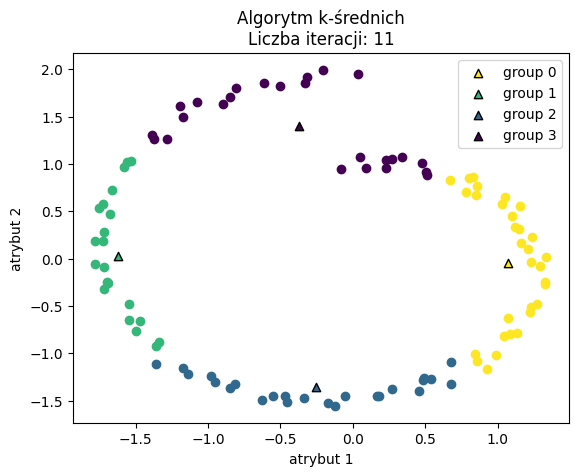

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#from zad1 import WczytajBazeProbekZTekstem

def EucDist(p1, p2):
    return np.sqrt(pow(p2.x-p1.x, 2)+pow(p2.y-p1.y, 2))

def KMeans(data, iters, n):
    V = data.sample(n)
    V = V.reset_index()
    data['Us'] = None
    for _ in range(iters):
        for s in range(len(data.index)):
            distance = np.inf
            for j in range(len(V.index)):
                if EucDist(V.iloc[j], data.iloc[s]) < distance:
                    distance = EucDist(V.iloc[j], data.iloc[s])
                    data.at[s, 'Us'] = j

        for i in range(len(V.index)):
            Xgr = data.loc[data['Us'] == i]
            if Xgr.size == 0:
                break
            else:
                V.loc[i, 'x'] = Xgr['x'].mean()
                V.loc[i, 'y'] = Xgr['y'].mean()
    plt.title(f'Algorytm k-średnich\nLiczba iteracji: {iters}')
    KMeans_plot(V, data)

def KMeans_plot(V, data):
    color = cm.viridis_r(np.linspace(0, 1, len(V.index)))
    for n in range(len(V.index)):
        part = data.loc[data['Us'] == n]
        plt.scatter(
            part['x'],
            part['y'],
            color=color[n])
        plt.scatter(
            V.loc[n, 'x'],
            V.loc[n, 'y'],
            color=color[n],
            marker='^',
            edgecolors='#000000',
            label=f"group {n}")
    plt.xlabel('atrybut 1')
    plt.ylabel('atrybut 2')
    plt.legend(loc="upper right")
    plt.show()


test = WczytajBazeProbekZTekstem("spirala.txt", "spirala-type.txt")
KMeans(test.Probki(), 11, 4)

Iteracja nr: 1
x = 41.572103345894995, y = -0.17537192679055932, rozrzut = 10
-----------------------------------------------------------------------
Iteracja nr: 2
x = 41.431520333951795, y = -0.1732460832669369, rozrzut = 10
-----------------------------------------------------------------------
Iteracja nr: 3
x = 37.80692787921927, y = -0.1120838090488055, rozrzut = 10
-----------------------------------------------------------------------
Iteracja nr: 4
x = 37.02308104913662, y = -0.09788166131210878, rozrzut = 10
-----------------------------------------------------------------------
Iteracja nr: 5
x = 37.02308104913662, y = -0.09788166131210878, rozrzut = 9.09090909090909
-----------------------------------------------------------------------
Iteracja nr: 6
x = 37.02308104913662, y = -0.09788166131210878, rozrzut = 8.264462809917354
-----------------------------------------------------------------------
Iteracja nr: 7
x = 35.3177700918144, y = -0.06681860266409435, rozrzut = 8.26

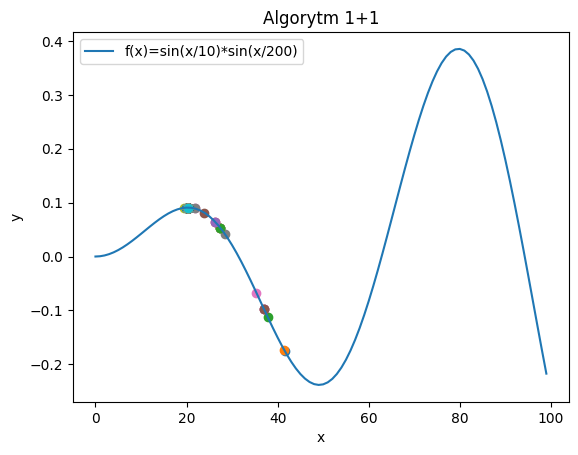

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def funkcja_przystosowania(x):
    return np.sin(x/10)*np.sin(x/200)

def algorithm_1plus1(rozrzut, wsp_przyrostu, l_iteracji, zakres_zmiennosci = [0, 100]):
    x = np.random.uniform(zakres_zmiennosci[0], zakres_zmiennosci[1])
    y = funkcja_przystosowania(x)
    for i in range(l_iteracji):
        x_pot = x + np.random.uniform(-rozrzut, rozrzut)
        if x_pot > zakres_zmiennosci[1]:
            x_pot = zakres_zmiennosci[1]
        elif x_pot < zakres_zmiennosci[0]:
            x_pot = zakres_zmiennosci
        y_pot = funkcja_przystosowania(x_pot)

        if y_pot >= y:
            x = x_pot
            y = y_pot
        else:
            rozrzut /= wsp_przyrostu
        print(f"Iteracja nr: {i+1}")
        print(f"x = {x}, y = {y}, rozrzut = {rozrzut}")
        print('-----------------------------------------------------------------------')
        plt.scatter(x, y)
    x = np.arange(0, 100)
    plt.title('Algorytm 1+1')
    plt.plot(x, funkcja_przystosowania(x), label='f(x)=sin(x/10)*sin(x/200)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

algorithm_1plus1(10, 1.1, 100)

Dla bitmapy testowej 1:
[[0 0 0 0]
 [0 0 1 1]
 [0 1 1 1]
 [0 0 0 1]
 [0 0 0 1]]
Najbardziej podobna jest bitmapa wzorcowa:
[[0 0 0 1]
 [0 0 1 1]
 [0 1 0 1]
 [0 0 0 1]
 [0 0 0 1]]


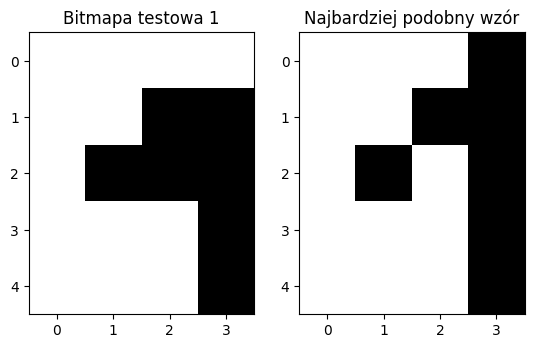

Dla bitmapy testowej 2:
[[1 1 1 1]
 [0 0 0 1]
 [1 1 1 1]
 [0 0 1 1]
 [1 1 1 1]]
Najbardziej podobna jest bitmapa wzorcowa:
[[1 1 1 0]
 [0 0 0 1]
 [1 1 1 1]
 [0 0 0 1]
 [1 1 1 0]]


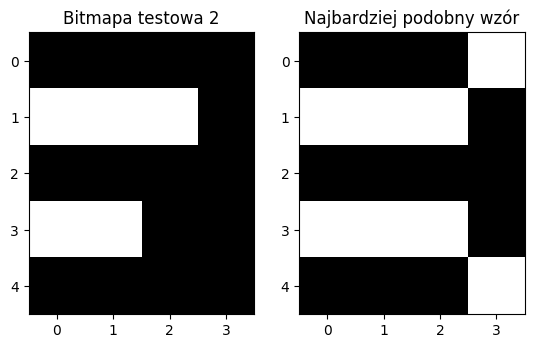

Dla bitmapy testowej 3:
[[1 1 1 1]
 [0 0 0 1]
 [0 0 1 0]
 [1 1 0 0]
 [1 1 1 1]]
Najbardziej podobna jest bitmapa wzorcowa:
[[0 1 1 1]
 [1 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 1 1 1]]


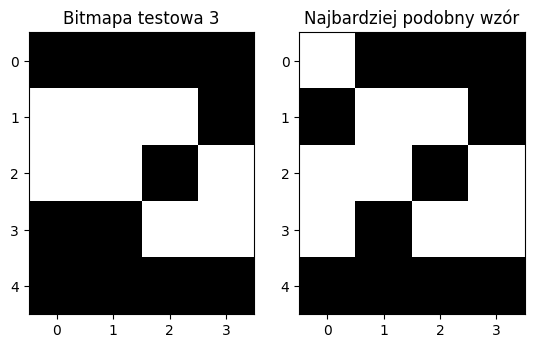

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def euc_distance2d(p1, p2):
    return np.sqrt(pow(p2[0]-p1[0], 2)+pow(p2[1]-p1[1], 2))

baza_wzor = [
    np.array([[0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1]]),
    np.array([[0, 1, 1, 1], [1, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 1, 1, 1]]),
    np.array([[1, 1, 1, 0], [0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 0]]),
]

baza_test = [
    np.array([[0, 0, 0, 0], [0, 0, 1, 1], [0, 1, 1, 1], [0, 0, 0, 1], [0, 0, 0, 1]]),
    np.array([[1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 1, 1], [1, 1, 1, 1]]),
    np.array([[1, 1, 1, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1, 1, 0, 0], [1, 1, 1, 1]]),
]

def miara_nieprawdopodobienstwa(BA, BB):
    miara = 0
    for pay in range(len(BA)):
        for pax in range(len(BA[pay])):
            if BA[pay, pax] == 1:
                odl_min = np.inf
                for pby in range(len(BB)):
                    for pbx in range(len(BB[pby])):
                        if BB[pby, pbx] == 1:
                            odl_akt = euc_distance2d((pay, pax),(pby, pbx))
                            odl_min = min(odl_min, odl_akt)
                miara += odl_min
    return miara

def miara_podobienstwa_obustronnego(BA, BB):
    wynik = miara_nieprawdopodobienstwa(BA, BB) + miara_nieprawdopodobienstwa(BB, BA)
    return -wynik

def zachlanne_dopasowanie(bitmap_test, bitmap_wzor):
    miara = -np.inf
    index = 0
    for i in range(len(bitmap_wzor)):
        miara_podob_obustronnego = miara_podobienstwa_obustronnego(bitmap_test, bitmap_wzor[i])
        if miara_podob_obustronnego > miara:
            miara = miara_podob_obustronnego
            index = i
    return bitmap_test, baza_wzor[index]

for i in range(len(baza_test)):
    bitmap_test, bitmap_wzor = zachlanne_dopasowanie(baza_test[i], baza_wzor)
    print(f'Dla bitmapy testowej {i+1}:\n{bitmap_test}\nNajbardziej podobna jest bitmapa wzorcowa:\n{bitmap_wzor}')
    plt.subplot(1, 2, 1)
    plt.imshow(bitmap_test, interpolation='nearest', cmap='Greys')
    plt.title(f'Bitmapa testowa {i+1}')
    plt.subplot(1, 2, 2)
    plt.imshow(bitmap_wzor, interpolation='nearest', cmap='Greys')
    plt.title(f'Najbardziej podobny wzór')
    plt.show()

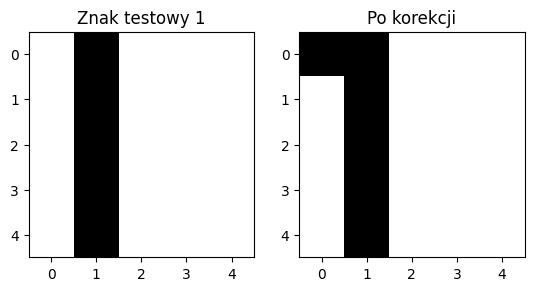

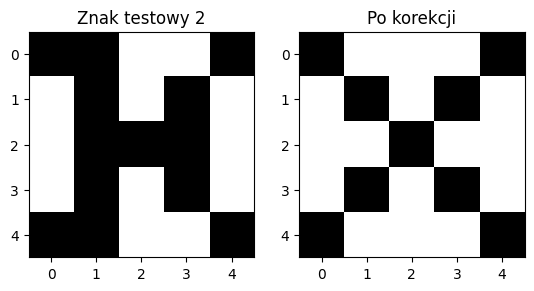

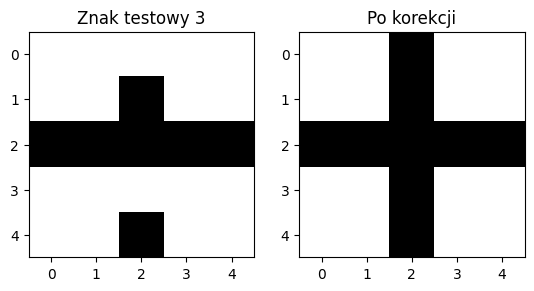

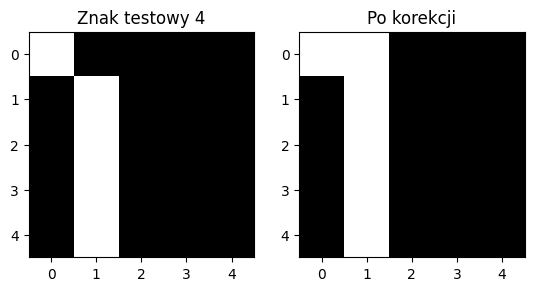

In [21]:
import numpy as np
import matplotlib.pyplot as plt

baza_wzor = [
    np.array([[1, 1, -1, -1, -1], [-1, 1, -1, -1, -1], [-1, 1, -1, -1, -1], [-1, 1, -1, -1, -1], [-1, 1, -1, -1, -1]]),
    np.array([[1, -1, -1, -1, 1], [-1, 1, -1, 1, -1], [-1, -1, 1, -1, -1], [-1, 1, -1, 1, -1], [1, -1, -1, -1, 1]]),
    np.array([[-1, -1, 1, -1, -1], [-1, -1, 1, -1, -1], [1, 1, 1, 1, 1], [-1, -1, 1, -1, -1], [-1, -1, 1, -1, -1]]),
]

baza_test = [
    np.array([[-1, 1, -1, -1, -1], [-1, 1, -1, -1, -1], [-1, 1, -1, -1, -1], [-1, 1, -1, -1, -1], [-1, 1, -1, -1, -1]]),
    np.array([[1, 1, -1, -1, 1], [-1, 1, -1, 1, -1], [-1, 1, 1, 1, -1], [-1, 1, -1, 1, -1], [1, 1, -1, -1, 1]]),
    np.array([[-1, -1, -1, -1, -1], [-1, -1, 1, -1, -1], [1, 1, 1, 1, 1], [-1, -1, -1, -1, -1], [-1, -1, 1, -1, -1]]),
    np.array([[-1, 1, 1, 1, 1], [1, -1, 1, 1, 1], [1, -1, 1, 1, 1], [1, -1, 1, 1, 1], [1, -1, 1, 1, 1]]),
]


class Siec_hopfielda:
    def __init__(self, h, w):
        self.h = h
        self.w = w
        self.n = h * w
        self.weights_table = np.zeros((self.n, self.n))

    def naucz_obraz(self, wzor):
        wyjscie = wzor.reshape(1, len(wzor[0]) * len(wzor[1]))
        for i in range(self.n):
            for j in range(self.n):
                if i == j:
                    continue
                self.weights_table[i][j] += (wyjscie[0][i] * wyjscie[0][j]) / self.n

    def rozpoznaj_obraz(self, obraz):
        wyjscie = obraz.reshape(1, len(obraz[0]) * len(obraz[1]))
        for i in range(self.n):
            suma = 0
            for j in range(self.n):
                if i == j:
                    continue
                suma += wyjscie[0][j] * self.weights_table[i][j]
            wyjscie[0][i] = 1 if suma >= 0 else -1
        obraz_skorygowany = wyjscie.reshape(len(obraz[0]), len(obraz[1]))
        obraz_negatyw = np.copy(obraz)
        for x in range(len(obraz_negatyw[0])):
            for y in range(len(obraz_negatyw[1])):
                obraz_negatyw[x, y] = 1 if obraz_negatyw[x, y] == -1 else -1
        if np.array_equal(obraz_skorygowany, obraz) or np.array_equal(obraz_skorygowany, obraz_negatyw):
            return obraz_skorygowany
        return self.rozpoznaj_obraz(obraz_skorygowany)

hopfield = Siec_hopfielda(5,5)
for wzor in baza_wzor:
    hopfield.naucz_obraz(wzor)

for i in range(len(baza_test)):
    plt.subplot(1, 2, 1)
    plt.imshow(baza_test[i], interpolation='nearest', cmap='Greys')
    plt.title(f'Znak testowy {i+1}')
    plt.subplot(1, 2, 2)
    plt.imshow(hopfield.rozpoznaj_obraz(baza_test[i]), interpolation='nearest', cmap='Greys')
    plt.title(f'Po korekcji')
    plt.show()